<a href="https://colab.research.google.com/github/Snehaannazac/colab-git-demo-sanna/blob/main/Lesson_5_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the provided URL
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)


In [2]:
# First 5 rows
print(df.head())

# Last 5 rows
print(df.tail())

# Data types
print(df.dtypes)

# Summary statistics
print(df.describe(include='all'))


   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  
     Survived  Pclass                            Name     Sex   Age  \
882         0       2 

In [7]:
# PclassCategory
df['PclassCategory'] = df['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})

# CabinCategory not available, so assign default
df['CabinCategory'] = 'Unknown'

# Handle missing Age values
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Family size = SibSp + Parch
df['Family'] = df['SibSp'] + df['Parch']


<ipython-input-7-3791198145>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [8]:
highest_fare = df['Fare'].max()
highest_fare_passengers = df[df['Fare'] == highest_fare]


In [9]:
largest_family_size = df['Family'].max()
largest_family_passengers = df[df['Family'] == largest_family_size]


In [10]:
names_series = pd.Series(df['Name'])
names_ages_df = df[['Name', 'Age']]
older_passengers = df[df['Age'] > 50]


In [11]:
# Highest fare passenger(s)
highest_fare = df['Fare'].max()
highest_fare_passengers = df[df['Fare'] == highest_fare]
print("Highest fare passengers:\n", highest_fare_passengers[['Name', 'Fare']])

# Largest family size passenger(s)
largest_family_size = df['Family'].max()
largest_family_passengers = df[df['Family'] == largest_family_size]
print("Passengers with the largest family size:\n", largest_family_passengers[['Name', 'Family']])


Highest fare passengers:
                                    Name      Fare
258                    Ward, Miss. Anna  512.3292
679  Cardeza, Mr. Thomas Drake Martinez  512.3292
737              Lesurer, Mr. Gustave J  512.3292
Passengers with the largest family size:
                                   Name  Family
159         Sage, Master. Thomas Henry      10
180       Sage, Miss. Constance Gladys      10
201                Sage, Mr. Frederick      10
324           Sage, Mr. George John Jr      10
792            Sage, Miss. Stella Anna      10
846           Sage, Mr. Douglas Bullen      10
863  Sage, Miss. Dorothy Edith "Dolly"      10


In [12]:
# Series of names
names_series = pd.Series(df['Name'])
print(names_series.head())

# DataFrame of names and ages
names_ages_df = df[['Name', 'Age']]
print(names_ages_df.head())

# Slice passengers older than 50
older_passengers = df[df['Age'] > 50]
print(older_passengers[['Name', 'Age']])


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object
                                                Name   Age
0                            Braund, Mr. Owen Harris  22.0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                             Heikkinen, Miss. Laina  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                           Allen, Mr. William Henry  35.0
                                                  Name   Age
6                              McCarthy, Mr. Timothy J  54.0
11                            Bonnell, Miss. Elizabeth  58.0
15                    Hewlett, Mrs. (Mary D Kingcome)   55.0
33                               Wheadon, Mr. Edward H  66.0
54                      Ostby, Mr. Engel

In [13]:
# Multi-index by Sex and Pclass
multi_index_df = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
print(multi_index_df)


Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


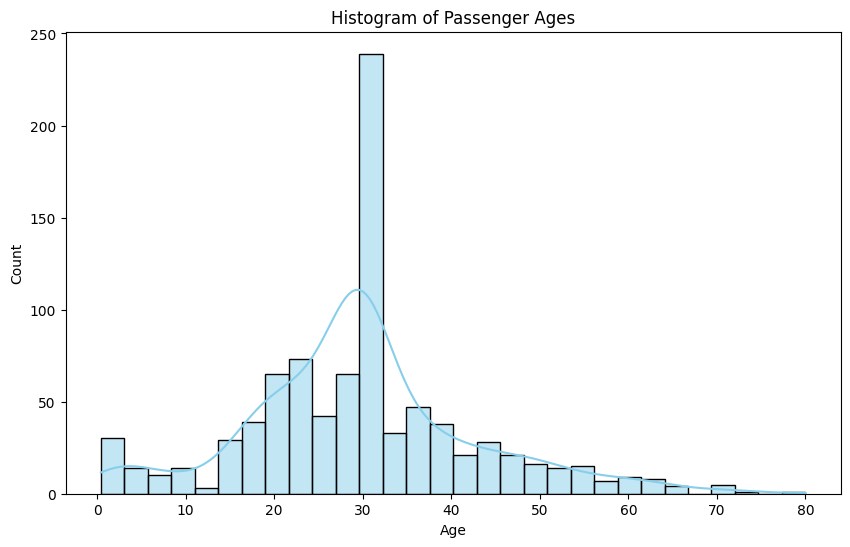

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


<ipython-input-15-3283547684>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', palette='viridis')


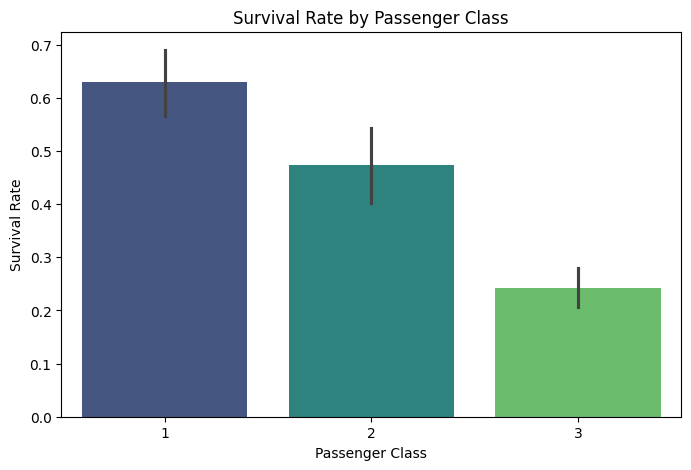

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Pclass', y='Survived', palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


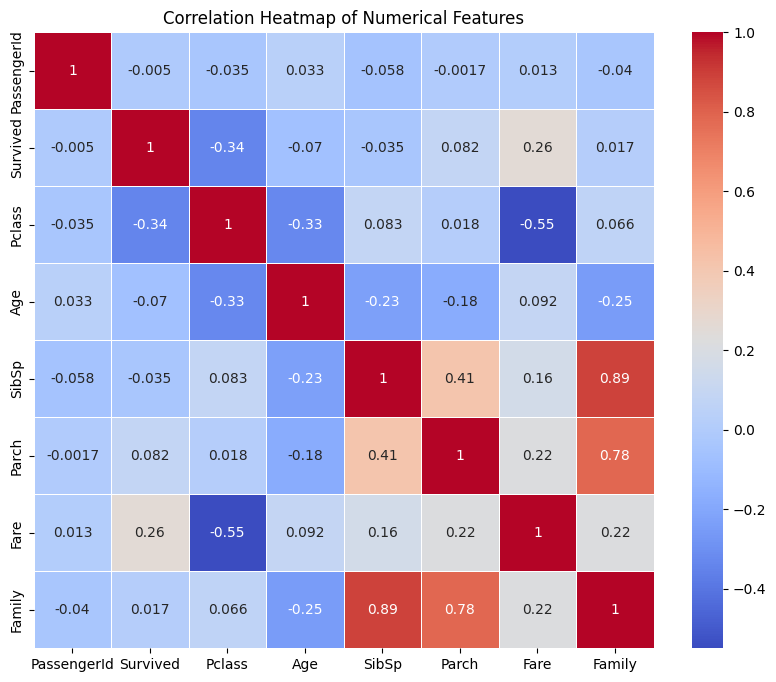

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


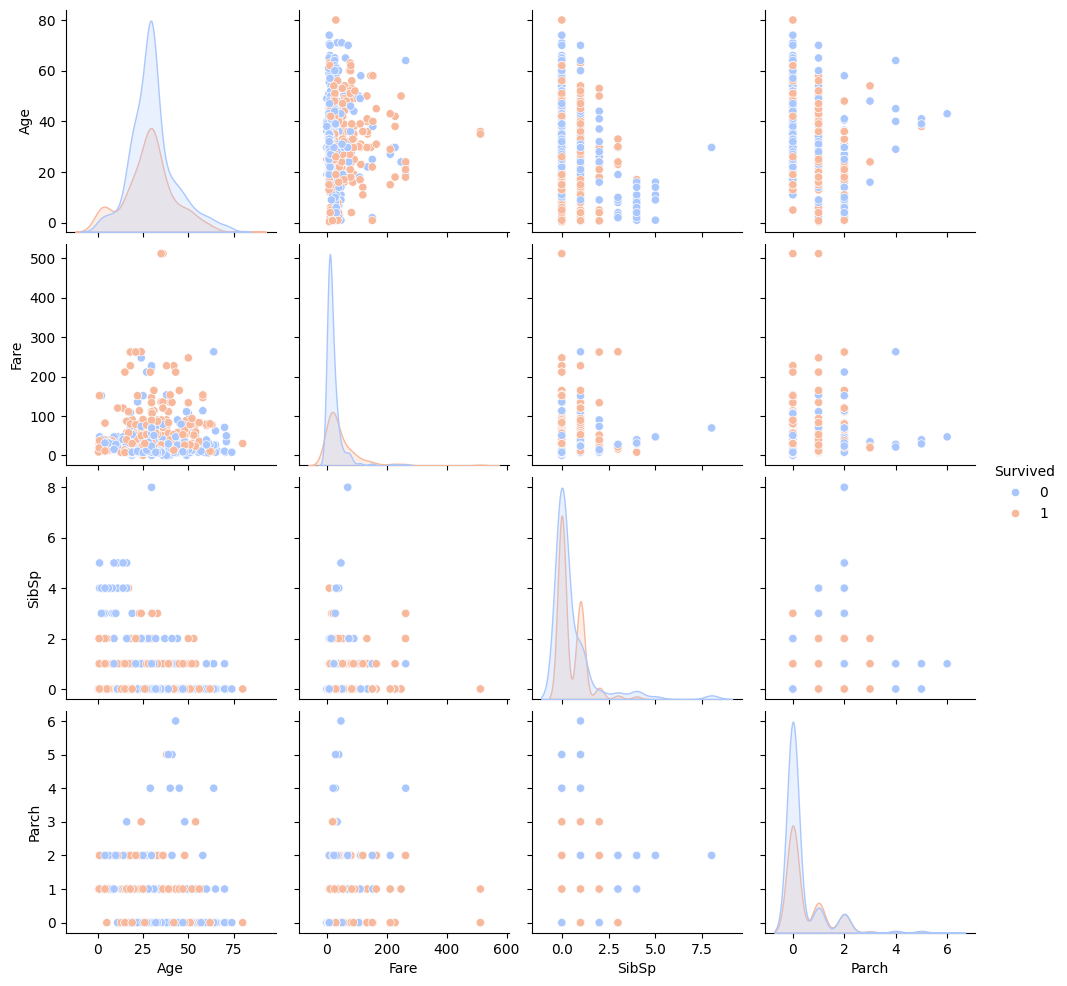

In [17]:
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived', palette='coolwarm')
plt.show()


In [18]:
# Survival by sex
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("Survival by sex:\n", survival_by_sex)

# Survival by class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Survival by class:\n", survival_by_class)


Survival by sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Survival by class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


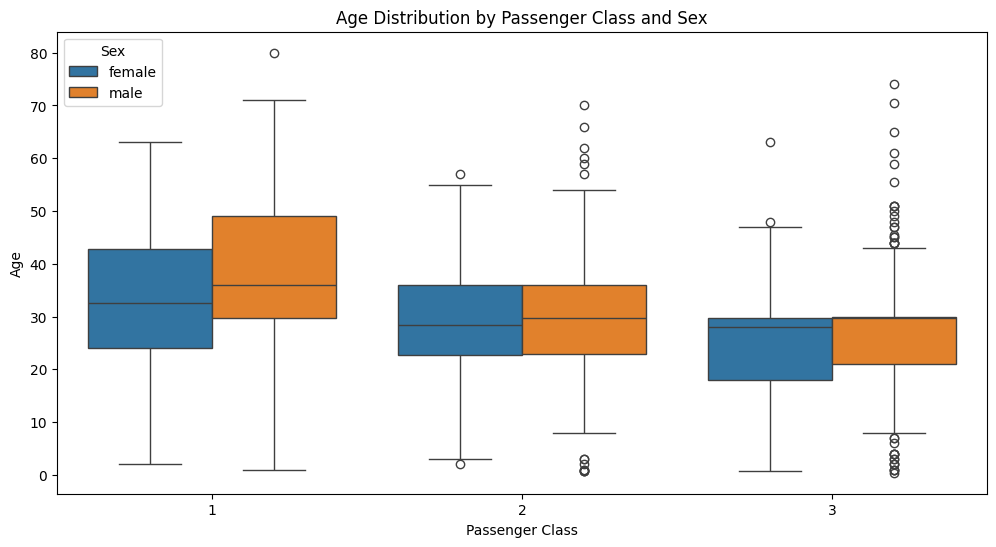

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Pclass', y='Age', hue='Sex')
plt.title('Age Distribution by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


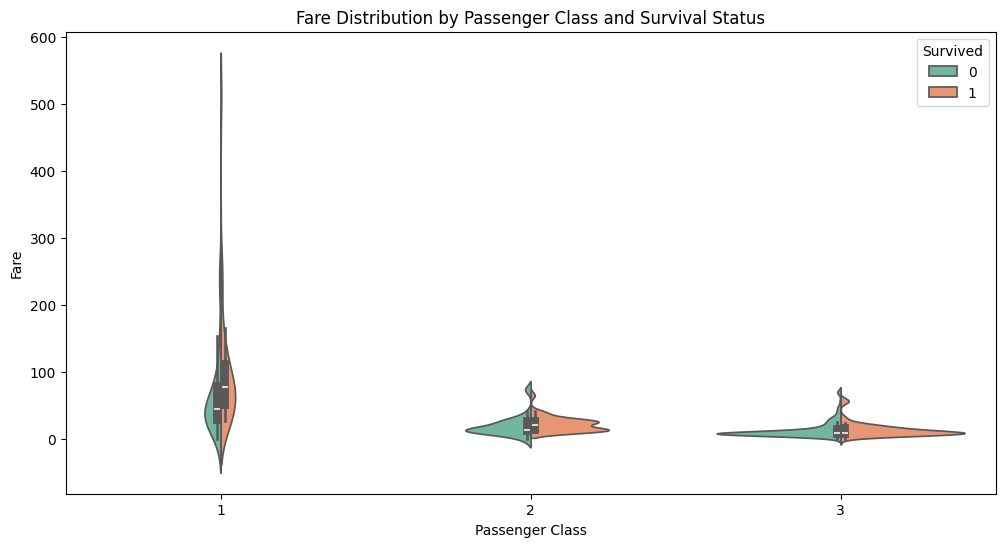

In [20]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Pclass', y='Fare', hue='Survived', split=True, palette='Set2')
plt.title('Fare Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


## Insights from EDA

- **Pclass** : Passengers in 1st class had significantly higher survival rates.
- **Family size** played a mixed role; having a very large family may have decreased survival chances.
- Missing values in **Age** were handled by mean imputation to preserve data.
- **Sex** : Females had a much higher survival rate than males.

